In [1]:
# Load modules
from __future__ import print_function
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
# https://machinelearningmastery.com/exponential-smoothing-for-time-series-forecasting-in-python/

In [3]:
# Load Dataset
ibm_df = pd.read_csv('../datasets/ibm-common-stock-closing-prices.csv')
ibm_df.head()


,Date,IBM common stock closing prices
0,1962-01-02,572.00
1,1962-01-03,577.00
2,1962-01-04,571.25
3,1962-01-05,560.00
4,1962-01-08,549.50


In [4]:
#Rename the second column
ibm_df.rename(columns={'IBM common stock closing prices': 'Close_Price'},
              inplace=True)
ibm_df.head()


,Date,Close_Price
0,1962-01-02,572.00
1,1962-01-03,577.00
2,1962-01-04,571.25
3,1962-01-05,560.00
4,1962-01-08,549.50


In [10]:
# Function for Sigle exponential smoothing
def single_exp_smoothing(x, alpha):
    F = [x[0]] # first value is same as series
    for t in range(1, len(x)):
        F.append(alpha * x[t] + (1 - alpha) * F[t-1])
    return F

ibm_df['SES'] = single_exp_smoothing(ibm_df['Close_Price'], 0.8)
ibm_df

,Date,Close_Price,SES,SES2,SES6,SES8
0,1962-01-02,572.00,572.000000,572.000000,572.000000,572.000000
1,1962-01-03,577.00,576.000000,573.000000,575.000000,576.000000
2,1962-01-04,571.25,572.200000,572.650000,572.750000,572.200000
3,1962-01-05,560.00,562.440000,570.120000,565.100000,562.440000
4,1962-01-08,549.50,552.088000,565.996000,555.740000,552.088000
5,1962-01-09,556.00,555.217600,563.996800,555.896000,555.217600
6,1962-01-10,557.00,556.643520,562.597440,556.558400,556.643520
7,1962-01-11,563.00,561.728704,562.677952,560.423360,561.728704
8,1962-01-12,564.00,563.545741,562.942362,562.569344,563.545741
9,1962-01-15,566.50,565.909148,563.653889,564.927738,565.909148


Text(0.5, 1.0, 'Single Exponential Smoothing')

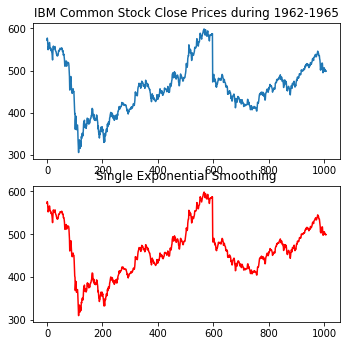

In [7]:
### Plot Single Exponential Smoothing forecasted value
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(2,1,1)
ibm_df['Close_Price'].plot(ax=ax)
ax.set_title('IBM Common Stock Close Prices during 1962-1965')
ax = fig.add_subplot(2,1,2)
ibm_df['SES'].plot(ax=ax, color='r')
ax.set_title('Single Exponential Smoothing')

In [8]:
# Plot the forecasted values using multiple alpha values
#Calculate the moving averages using 'rolling' and 'mean' functions
ibm_df['SES2']  = single_exp_smoothing(ibm_df['Close_Price'], 0.2)
ibm_df['SES6']= single_exp_smoothing(ibm_df['Close_Price'], 0.6)
ibm_df['SES8']= single_exp_smoothing(ibm_df['Close_Price'], 0.8)

Text(0.5, 1.0, 'Alpha 0.8')

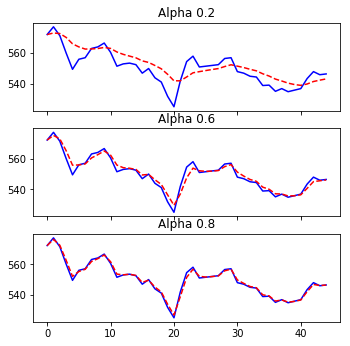

In [9]:
# Plot the curves
f, axarr = plt.subplots(3, sharex=True)
f.set_size_inches(5.5, 5.5)

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[0])
ibm_df['SES2'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[0])
axarr[0].set_title('Alpha 0.2')

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[1])
ibm_df['SES6'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[1])
axarr[1].set_title('Alpha 0.6')

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[2])
ibm_df['SES8'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[2])
axarr[2].set_title('Alpha 0.8')